<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/Fault_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO - CLASIFICACIÓN DE FALLAS**

Santiago Pardo Morales - 202013025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from scipy.optimize import curve_fit

In [2]:
ae_df = pd.read_csv('df_with_anomalies.csv',sep=';')
iqr_df = pd.read_csv('statistical_df_with_anomalies.csv',sep=';')

In [3]:
anomaly_iqr = iqr_df[iqr_df['Anomaly']==1]
no_anomaly_iqr = iqr_df[iqr_df['Anomaly']==0]

In [4]:
anomaly_ae = ae_df[ae_df['Anomaly']==1]
no_anomaly_ae = ae_df[ae_df['Anomaly']==0]

In [5]:
#Coincidencias con modelo estadístico
print(anomaly_iqr['Timestamp'].isin(anomaly_ae['Timestamp']).sum())

43418


## **COMPARACIÓN FINAL CON MÉTODO ESTADÍSTICO**

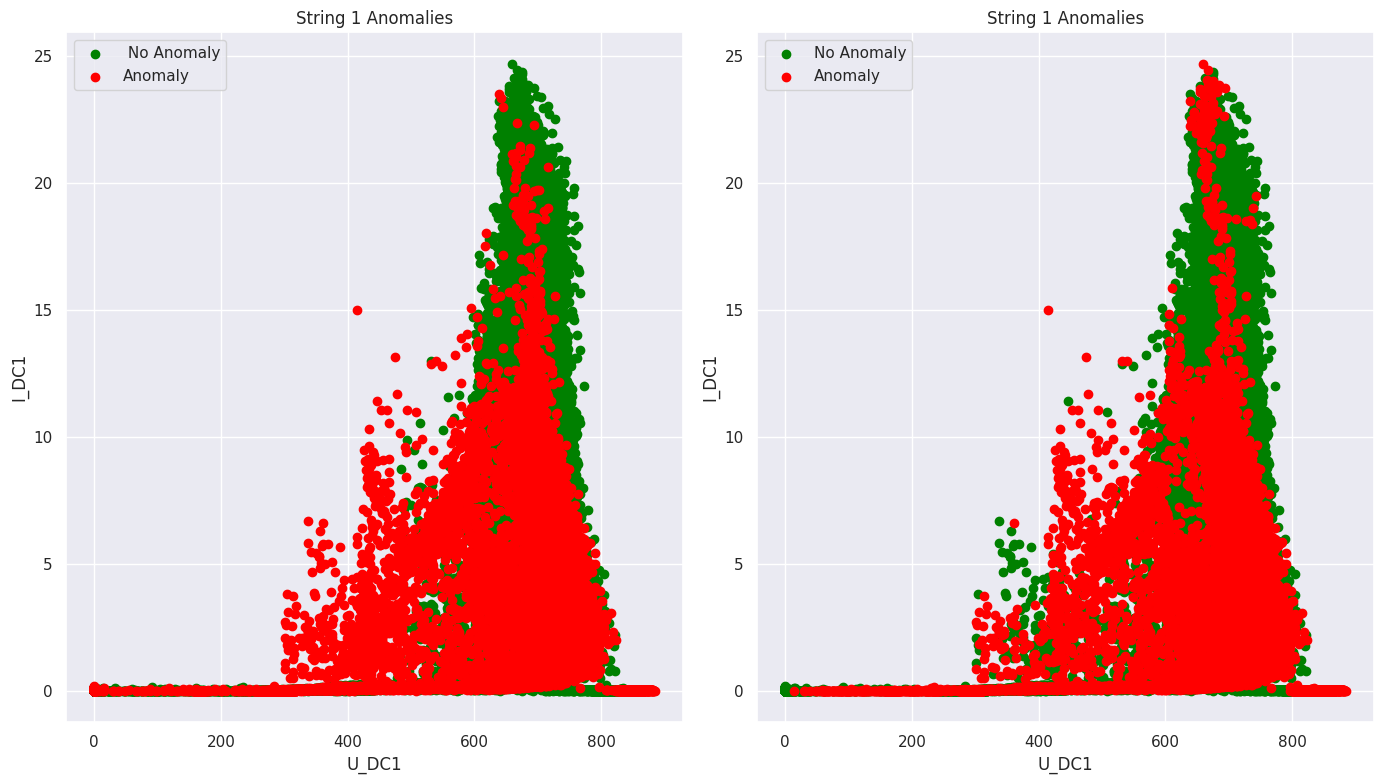

In [6]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))

# Gráfico 1
plt.subplot(1,2,1)
plt.scatter(no_anomaly_iqr['U_DC1'], no_anomaly_iqr['I_DC1'], label=' No Anomaly',color='green')
plt.scatter(anomaly_iqr['U_DC1'], anomaly_iqr['I_DC1'], label='Anomaly',color='red')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('String 1 Anomalies')

# Gráfico 2
plt.subplot(1,2,2)
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='green')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='red')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('String 1 Anomalies')


# Ajustes de diseño
plt.tight_layout()
plt.show()

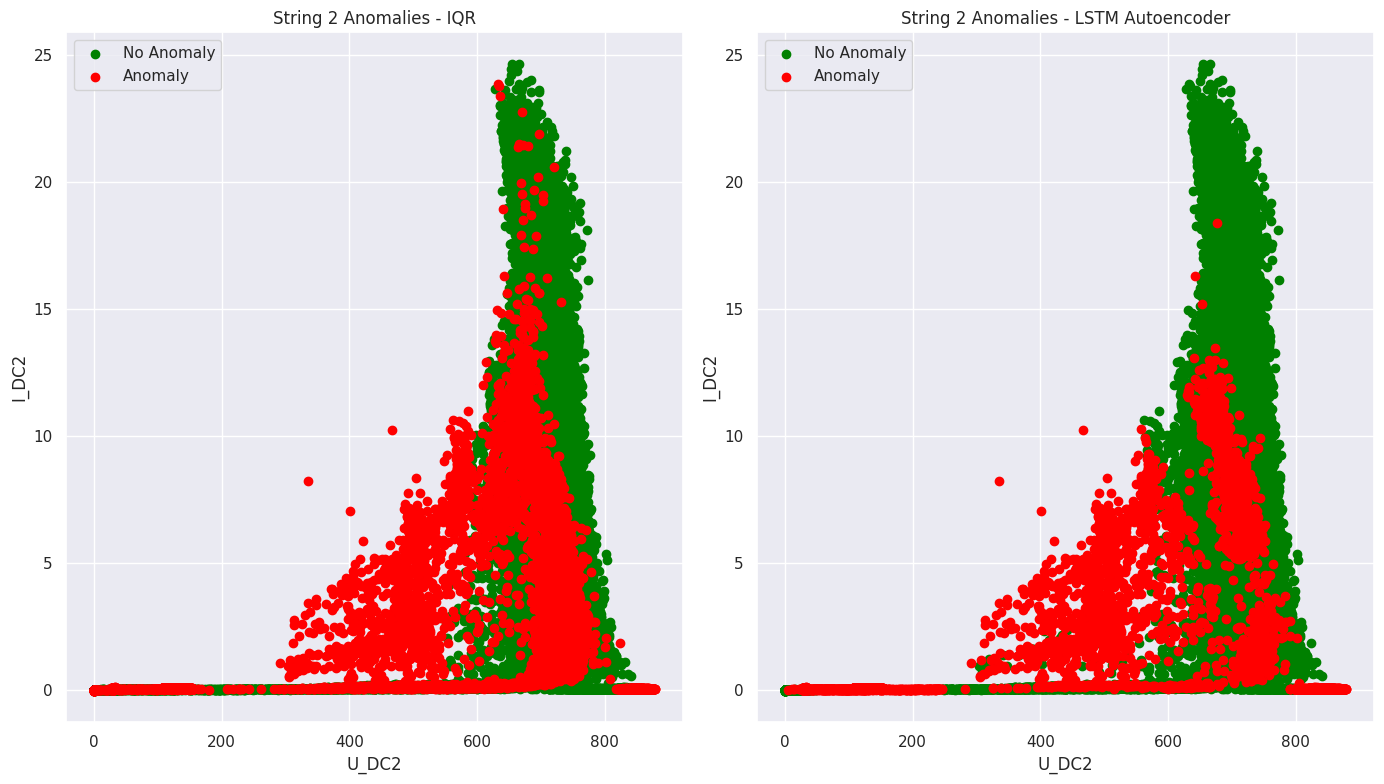

In [7]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))

# Gráfico 1
plt.subplot(1,2,1)
plt.scatter(no_anomaly_iqr['U_DC2'], no_anomaly_iqr['I_DC2'], label='No Anomaly',color='green')
plt.scatter(anomaly_iqr['U_DC2'], anomaly_iqr['I_DC2'], label='Anomaly',color='red')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('String 2 Anomalies - IQR')

# Gráfico 2
plt.subplot(1,2,2)
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='green')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='red')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('String 2 Anomalies - LSTM Autoencoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

In [8]:
#Inicializar etiquetas - No fault
ae_df['Label'] = 'No Fault'
ae_df['Anomaly_String1'] = 'No Fault'
ae_df['Anomaly_String2'] = 'No Fault'

In [9]:
ae_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0,No Fault,No Fault,No Fault
1,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0,No Fault,No Fault,No Fault
2,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0,No Fault,No Fault,No Fault
3,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0,No Fault,No Fault,No Fault
4,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0,No Fault,No Fault,No Fault
...,...,...,...,...,...,...,...,...,...
150393,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0,No Fault,No Fault,No Fault
150394,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0,No Fault,No Fault,No Fault
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,No Fault
150396,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1,No Fault,No Fault,No Fault


## **ENCONTRAR VMP y IMP**

In [10]:
ae_df['P_DC1'] = ae_df['U_DC1']*ae_df['I_DC1']
ae_df['P_DC2'] = ae_df['U_DC2']*ae_df['I_DC2']

In [11]:
ae_df['P_DC1'].idxmax()

9019

In [12]:
ae_df['P_DC2'].idxmax()

9033

In [13]:
v_mp1 = ae_df['U_DC1'].iloc[9019]
i_mp1 = ae_df['I_DC1'].iloc[9019]

In [14]:
v_mp1,i_mp1

(716.312, 23.022)

In [15]:
v_mp2 = ae_df['U_DC2'].iloc[9033]
i_mp2 = ae_df['I_DC2'].iloc[9033]

In [16]:
v_mp2,i_mp2

(685.026, 24.02)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


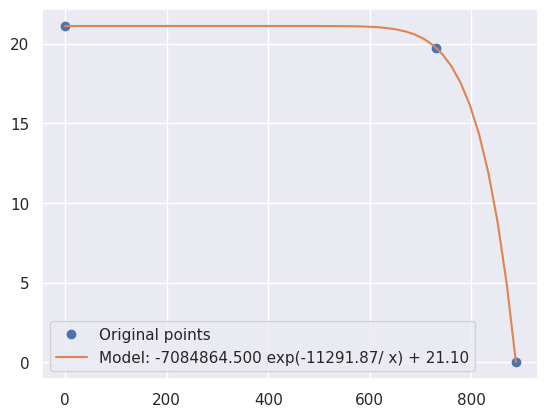

In [17]:
x = np.array([ 0.01,730.8,887.4])
y = np.array([21.1,19.72,0.01])

def fun(x, a, b, c):
    return a*np.exp(b/x)+c

coef,_ = curve_fit(fun, x, y)

plt.plot(x, y, 'o', label='Original points')
plt.plot(np.linspace(x[0],x[-1]), fun(np.linspace(x[0],x[-1]), *coef), label=f'Model: %5.3f exp(%4.2f/ x) + %4.2f' % tuple(coef) )
plt.legend()
plt.show()

## STRING 1

<ipython-input-18-0c791556d19b>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

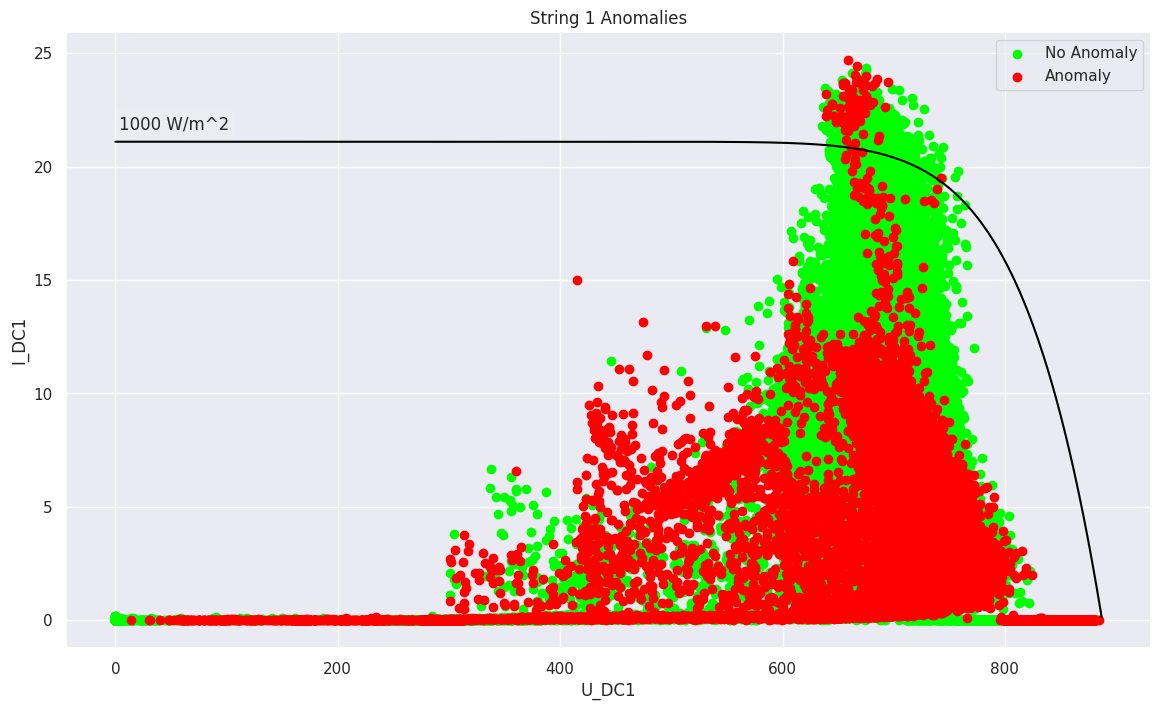

In [18]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='lime')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='red')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('String 1 Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [19]:
ae_df['P_DC1'].mean()

2918.472676096883

In [20]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['I_DC1'] > 6)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,1,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [21]:
ae_df[(ae_df['P_DC1'] >= 2915) & (ae_df['P_DC1'] <= 2920) & (ae_df['U_DC1'] > 400) & (ae_df['U_DC1'] < 500)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
3519,2019-08-27 16:20:00,476.516,744.416,6.126,1.646,1,No Fault,No Fault,No Fault,2919.137016,1225.308736


In [22]:
ae_df['I_DC1'].mean()

4.134151039242543

In [23]:
ae_df['U_DC1'].mean()

693.9819170002261

### Determinar sombreo

<ipython-input-24-5d616321f86e>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-24-5d616321f86e>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-24-5d616321f86e>:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-24-5d616321f86e>:38: UserWarning: color is re

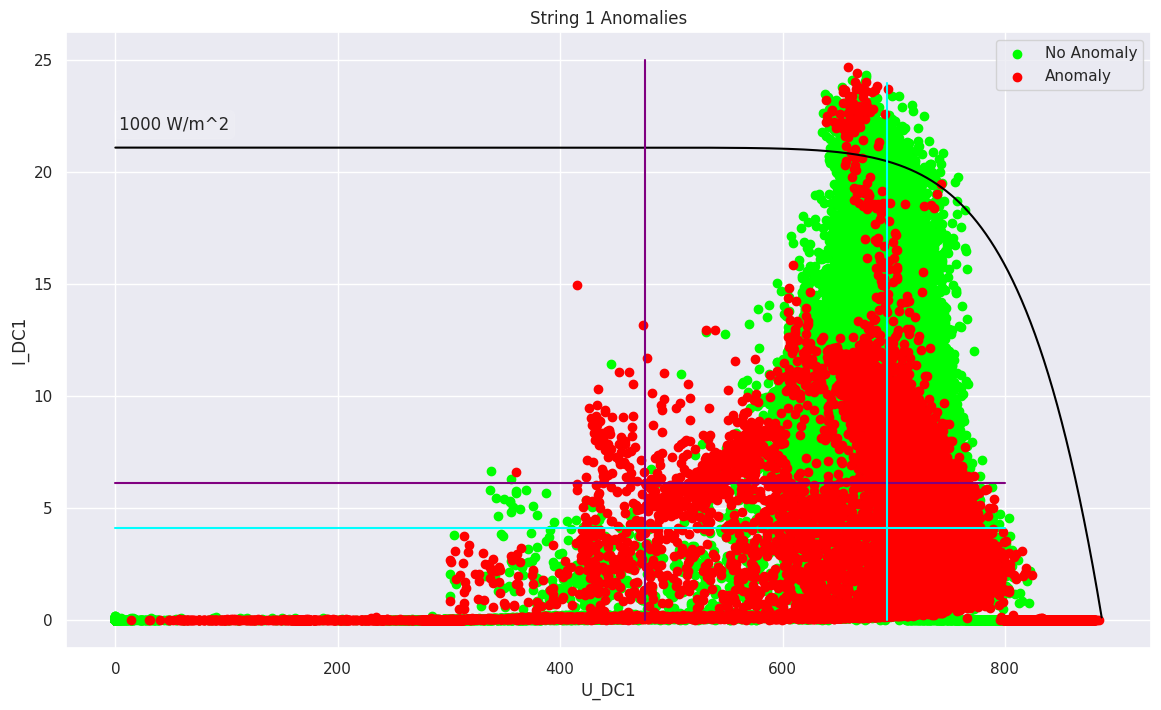

In [24]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC1'], no_anomaly_ae['I_DC1'], label='No Anomaly',color='lime')
plt.scatter(anomaly_ae['U_DC1'], anomaly_ae['I_DC1'], label='Anomaly',color='red')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('String 1 Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 476.516
y_mean_power1 = 6.126

y_mean_power1_yaxis = np.arange(0,26,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 693.9819170002261
y_mean_current1 = 4.134151039242543

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])


plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

Los datos de sombreo son entonces, aquellos que están en el cuadrante inferior izquierdo y son superiores a 0

In [25]:
shading_power1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_power1) & (ae_df['I_DC1']< y_mean_power1)]
shading_voltage1 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC1']< x_mean_voltage1) & (ae_df['I_DC1']< 19.1)]
shading_current1 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC1']>0) & (ae_df['U_DC1']>0) & (ae_df['I_DC1']< y_mean_current1) ]

In [26]:
shading_union = shading_power1.index.union(shading_voltage1.index).union(shading_current1.index)

In [27]:
ae_df.loc[shading_union,'Anomaly_String1'] = 'Shading'

In [28]:
ae_df[ae_df['Anomaly_String1'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
364,2019-08-05 12:00:00,819.310,818.010,0.010,0.030,1,No Fault,Shading,No Fault,8.193100,24.540300
431,2019-08-06 05:45:00,196.260,196.073,0.010,0.017,1,No Fault,Shading,No Fault,1.962600,3.333241
576,2019-08-07 06:00:00,551.308,635.440,0.148,0.172,1,No Fault,Shading,No Fault,81.593584,109.295680
718,2019-08-08 06:05:00,235.070,236.358,0.010,0.020,1,No Fault,Shading,No Fault,2.350700,4.727160
973,2019-08-09 15:30:00,627.040,569.202,11.442,3.244,1,No Fault,Shading,No Fault,7174.591680,1846.491288
...,...,...,...,...,...,...,...,...,...,...,...
150177,2023-05-31 15:55:00,437.930,352.176,7.802,2.686,1,No Fault,Shading,No Fault,3416.729860,945.944736
150178,2023-05-31 16:00:00,434.826,347.726,7.842,3.326,1,No Fault,Shading,No Fault,3409.905492,1156.536676
150179,2023-05-31 16:05:00,556.382,680.244,4.686,1.954,1,No Fault,Shading,No Fault,2607.206052,1329.196776
150196,2023-05-31 17:30:00,593.362,610.896,0.122,0.154,1,No Fault,Shading,No Fault,72.390164,94.077984


## STRING 2

<ipython-input-29-7bc01d3e34f4>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')


Text(0.1, 0.85, '1000 W/m^2')

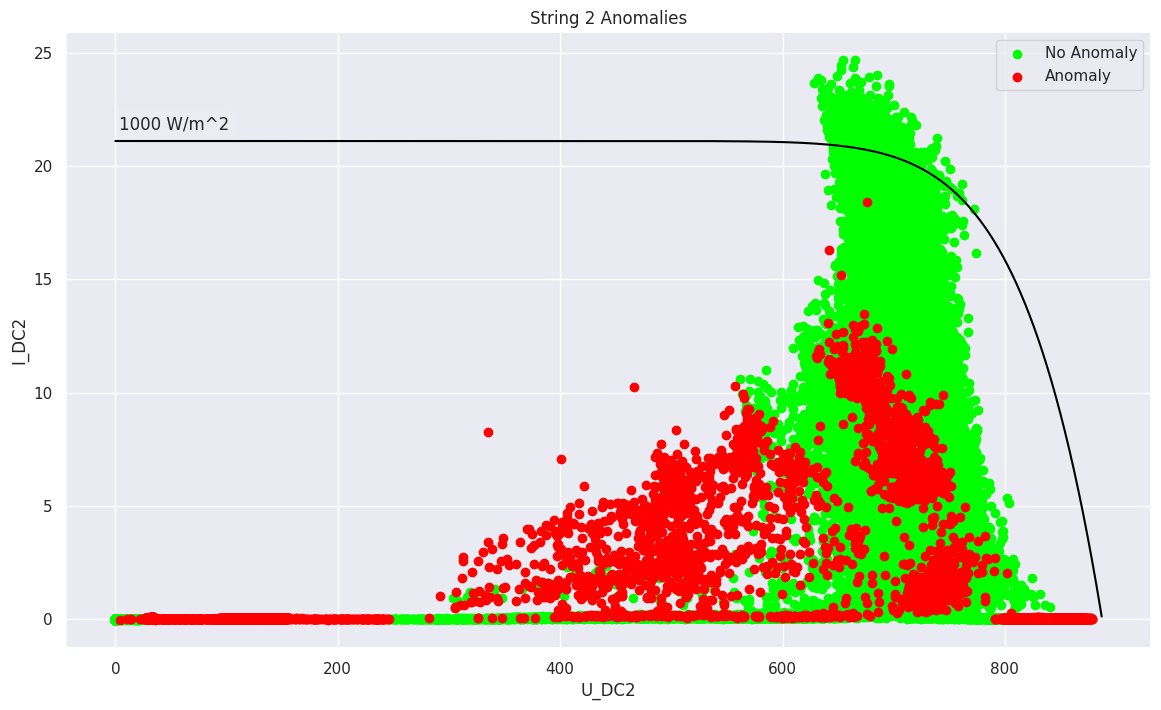

In [29]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='lime')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='red')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('String 2 Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

In [30]:
ae_df['P_DC2'].mean()

2091.0071947071306

In [31]:
ae_df[(ae_df['P_DC2'] >= 2100) & (ae_df['P_DC2'] <= 2100) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2


In [32]:
2091.0071947071306 - 2048.940096

42.067098707130754

In [33]:
2091.0071947071306 - 2121.659808

-30.65261329286932

In [34]:
ae_df[(ae_df['P_DC2'] >= 2100) & (ae_df['P_DC2'] <= 2150) & (ae_df['I_DC2'] >= 4.5)]

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
17098,2019-12-01 16:30:00,707.556,453.718,2.912,4.722,1,No Fault,Shading,No Fault,2060.403072,2142.456396
21606,2020-01-02 16:50:00,692.314,416.782,3.946,5.140,1,No Fault,Shading,No Fault,2731.871044,2142.259480
22723,2020-01-10 16:50:00,690.474,454.018,2.960,4.676,1,No Fault,Shading,No Fault,2043.803040,2122.988168
27276,2020-02-12 17:00:00,700.986,458.044,2.692,4.632,1,No Fault,Shading,No Fault,1887.054312,2121.659808


In [35]:
ae_df['I_DC2'].mean()

2.9501705940238563

In [36]:
ae_df['U_DC2'].mean()

554.7488825117355

### Determinar sombreo

<ipython-input-37-0499ce888d20>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x, y, 'r', color='black')
<ipython-input-37-0499ce888d20>:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
<ipython-input-37-0499ce888d20>:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804, 1)). The keyword argument will take precedence.
  plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
<ipython-input-37-0499ce888d20>:37: UserWarning: color is re

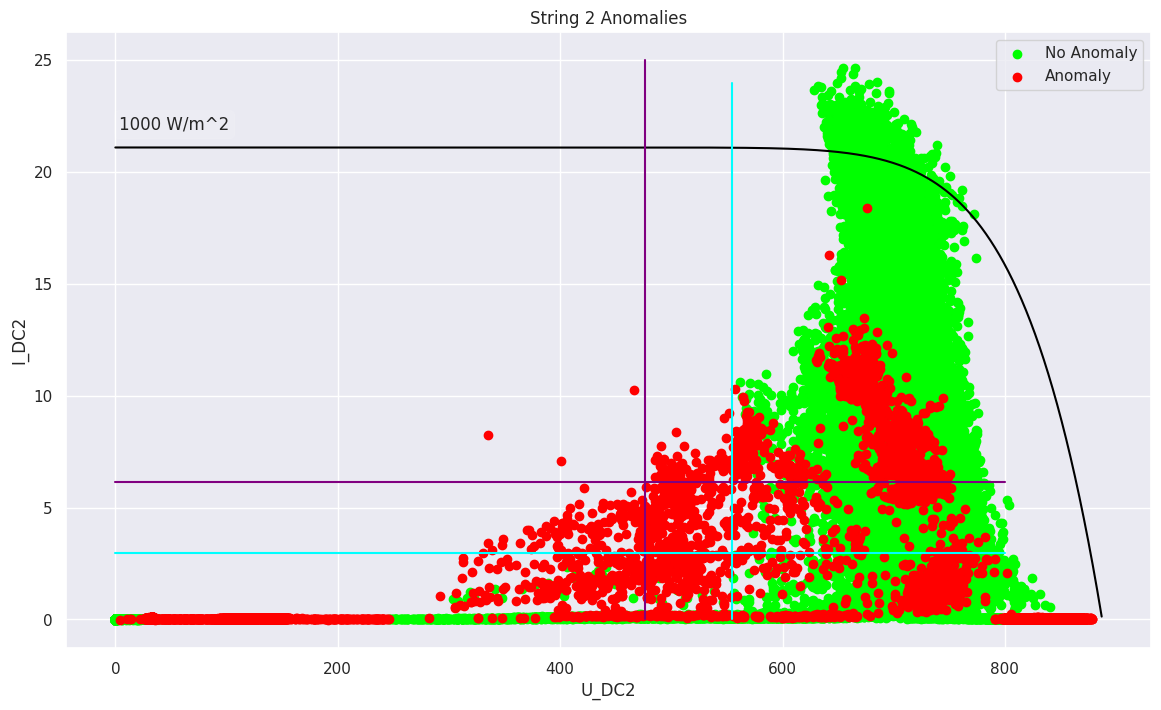

In [37]:
plt.figure(figsize=(14, 8))
x = np.arange(0.01,887.4,1)
y = -7084864.500*np.exp(-11291.87/x)+21.10

plt.plot(x, y, 'r', color='black')
plt.scatter(no_anomaly_ae['U_DC2'], no_anomaly_ae['I_DC2'], label='No Anomaly',color='lime')
plt.scatter(anomaly_ae['U_DC2'], anomaly_ae['I_DC2'], label='Anomaly',color='red')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('String 2 Anomalies')

plt.annotate('1000 W/m^2', xy=(0.1, 0.85), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', alpha=0.1, facecolor='white'))

x_mean_power1 = 476.516
y_mean_power1 = 6.126

y_mean_power1_yaxis = np.arange(0,26,1)
x_mean_power1_yaxis = x_mean_power1*np.ones(y_mean_power1_yaxis.shape[0])

x_mean_power1_xaxis = np.arange(0,900,100)
y_mean_power1_xaxis = y_mean_power1*np.ones(x_mean_power1_xaxis.shape[0])

x_mean_voltage1 = 554.7488825117355
y_mean_current1 = 2.9501705940238563

y_mean_voltage1_axis = np.arange(0,25,1)
x_mean_voltage1_axis = x_mean_voltage1*np.ones(y_mean_voltage1_axis.shape[0])

x_mean_current1_axis = np.arange(0,900,100)
y_mean_current1_axis = y_mean_current1*np.ones(x_mean_current1_axis.shape[0])

plt.plot(x_mean_power1_yaxis, y_mean_power1_yaxis, 'r', color='purple')
plt.plot(x_mean_power1_xaxis, y_mean_power1_xaxis, 'r', color='purple')
plt.plot(x_mean_voltage1_axis, y_mean_voltage1_axis, 'r', color='cyan')
plt.plot(x_mean_current1_axis, y_mean_current1_axis, 'r', color='cyan')

In [38]:
shading_power2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>0) & (ae_df['U_DC2']>0) & (ae_df['U_DC2']< x_mean_power1) & (ae_df['I_DC2']< y_mean_power1)]
shading_voltage2 = ae_df[(ae_df['Anomaly'] == 1) & (ae_df['I_DC2']>0) & (ae_df['U_DC1']>0) & (ae_df['U_DC2']< x_mean_voltage1) & (ae_df['I_DC2']< 19.1)]
shading_current2 = ae_df[(ae_df['Anomaly'] == 1) &(ae_df['I_DC2']>0) & (ae_df['U_DC2']>0) & (ae_df['I_DC2']< y_mean_current1) ]

In [39]:
shading_union = shading_power2.index.union(shading_voltage2.index).union(shading_current2.index)

In [40]:
ae_df.loc[shading_union,'Anomaly_String2'] = 'Shading'

In [41]:
ae_df[ae_df['Anomaly_String2'] == 'Shading']

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly,Label,Anomaly_String1,Anomaly_String2,P_DC1,P_DC2
364,2019-08-05 12:00:00,819.310,818.010,0.010,0.030,1,No Fault,Shading,Shading,8.193100,24.540300
431,2019-08-06 05:45:00,196.260,196.073,0.010,0.017,1,No Fault,Shading,Shading,1.962600,3.333241
576,2019-08-07 06:00:00,551.308,635.440,0.148,0.172,1,No Fault,Shading,Shading,81.593584,109.295680
718,2019-08-08 06:05:00,235.070,236.358,0.010,0.020,1,No Fault,Shading,Shading,2.350700,4.727160
974,2019-08-09 15:35:00,634.014,726.542,10.906,1.568,1,No Fault,Shading,Shading,6914.556684,1139.217856
...,...,...,...,...,...,...,...,...,...,...,...
150179,2023-05-31 16:05:00,556.382,680.244,4.686,1.954,1,No Fault,Shading,Shading,2607.206052,1329.196776
150196,2023-05-31 17:30:00,593.362,610.896,0.122,0.154,1,No Fault,Shading,Shading,72.390164,94.077984
150339,2023-06-02 05:40:00,94.104,94.308,0.004,0.010,1,No Fault,Shading,Shading,0.376416,0.943080
150395,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1,No Fault,No Fault,Shading,11606.720720,4784.515500
